**Predict survival on the Titanic**

In [70]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 


**Load the Data**

In [42]:
#Importing Data Set
ds= pd.read_csv('/content/titanic_train.csv')

**View the data**

In [43]:
#View the data
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
#Statistical details of the dataset
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Cleaning**

In [45]:
# check missing values in train data
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
#remplace missing values with median
ds["Age"].fillna(ds["Age"].median(skipna=True), inplace=True)

In [48]:
#create categorical variables
gender=pd.get_dummies(ds['Sex'],drop_first=True)
ds['Sex']=gender

In [50]:
# Create categorical variable for traveling alone
ds['TravelAlone']=np.where((ds["SibSp"]+ds["Parch"])>0, 0, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


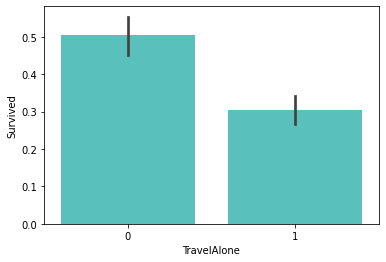

In [51]:
sns.barplot('TravelAlone', 'Survived', data=ds, color="mediumturquoise")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


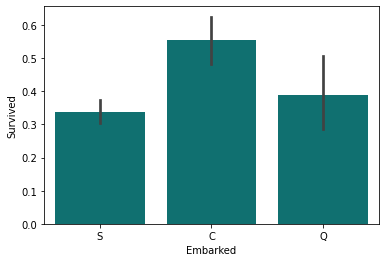

In [52]:
#Exploration of Embarked Port
sns.barplot('Embarked', 'Survived', data=ds, color="teal")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


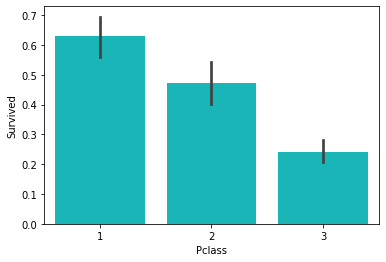

In [53]:
#Exploration of Passenger Class
sns.barplot('Pclass', 'Survived', data=ds, color="darkturquoise")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


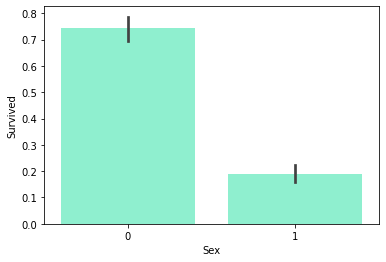

In [54]:
#Exploration of Gender Variable
sns.barplot('Sex', 'Survived', data=ds, color="aquamarine")
plt.show()

In [55]:
#drop variables which are not required
ds.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId','SibSp','Parch','Embarked'], axis=1, inplace=True)

In [56]:
#View Data after cleaning
ds.head()

,Survived,Pclass,Sex,Age,Fare,TravelAlone
0,0,3,1,22.0,7.2500,0
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,1
3,1,1,0,35.0,53.1000,0
4,0,3,1,35.0,8.0500,1


**Data Modelling**

In [57]:
#Divide the data into “attributes” and “labels”
X=ds.drop('Survived',axis=1) #separate the other attributes from the predicting attribute
y=ds['Survived']

In [85]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [86]:
# Model initialization
RandomForest_model = RandomForestClassifier()
# Fit the data(train the model)
RandomForest_model.fit(X_train,y_train)

y_pred=RandomForest_model.predict(X_test)

**Model evaluation**

In [87]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.832089552238806
